In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        if alpha < 1e-3:
            break
    return alpha

In [62]:
def GD_WT(f, grad_f, x0, kmax, tolf, tolx, alpha):
    xsol=x0
    x=[x0]
    f_val=[f(xsol)]
    grad=[grad_f(xsol)]
    err=[np.linalg.norm(grad_f(xsol))]
    i=0
    cond = True
    while i < kmax and cond :
        xsol=(xsol-alpha*grad_f(xsol))
        x.append(xsol)
        f_val.append(f(xsol))
        grad.append(grad_f(xsol))
        err.append(np.linalg.norm(grad_f(xsol)))
        i+=1
        cond =  np.linalg.norm(grad_f(xsol)) > tolf*np.linalg.norm(grad_f(x0)) and np.linalg.norm(x[i]-x[i-1]) > tolx
    return x,i,f_val,grad,err

In [63]:
def GD(f, grad_f, x0, kmax, tolf, tolx):
    xsol=x0
    x=[x0]
    f_val=[f(xsol)]
    grad=[grad_f(xsol)]
    err=[np.linalg.norm(grad_f(xsol))]
    i=0
    cond = True
    while i < kmax and cond :
        alpha = backtracking(f, grad_f, xsol)
        xsol=(xsol-alpha*grad_f(xsol))
        x.append(xsol)
        f_val.append(f(xsol))
        grad.append(grad_f(xsol))
        err.append(np.linalg.norm(grad_f(xsol)))
        i+=1
        cond =  np.linalg.norm(grad_f(xsol)) > tolf*np.linalg.norm(grad_f(x0)) and np.linalg.norm(x[i]-x[i-1]) > tolx
    return x,i,f_val,grad,err

In [64]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1 - 3)**2 + (x2 - 1)**2
def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array((2*x1-6, 2*x2 -2))

### GD with backtracking method 

In [65]:
x0 = np.array((0,0))
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD(f,grad_f, x0, 1000, 1e-5, 1e-5)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [2.99993978 0.99997993]
K= 81
f(x)= 4.029995763705566e-09
grad_f(x)= [-1.20449096e-04 -4.01496987e-05]
Error= 0.00012696449525289447


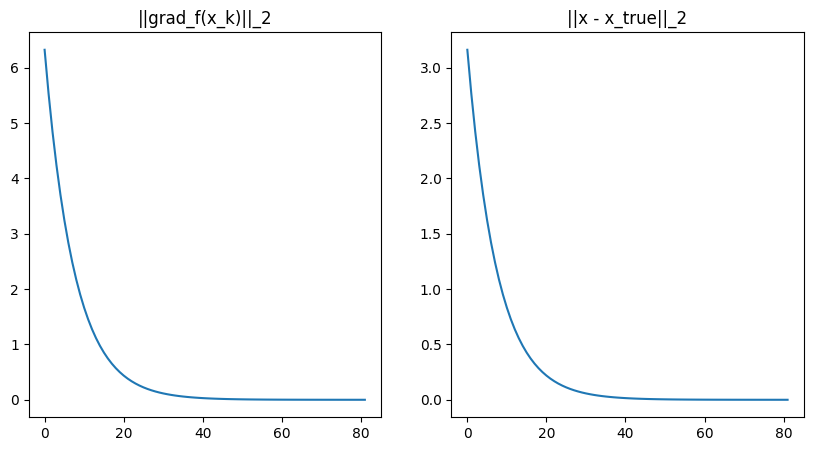

In [66]:
x_true = np.array([3,1])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("||grad_f(x_k)||_2")
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.subplot(1,2,2)
plt.title("||x - x_true||_2")
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()

### GD without backtracking method with alpha = 0.01

In [67]:
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD_WT(f,grad_f, x0, 1000, 1e-5, 1e-5, 1e-2)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [2.99954242 0.99984747]
K= 435
f(x)= 2.32640783847221e-07
grad_f(x)= [-0.00091515 -0.00030505]
Error= 0.0009646570040117285


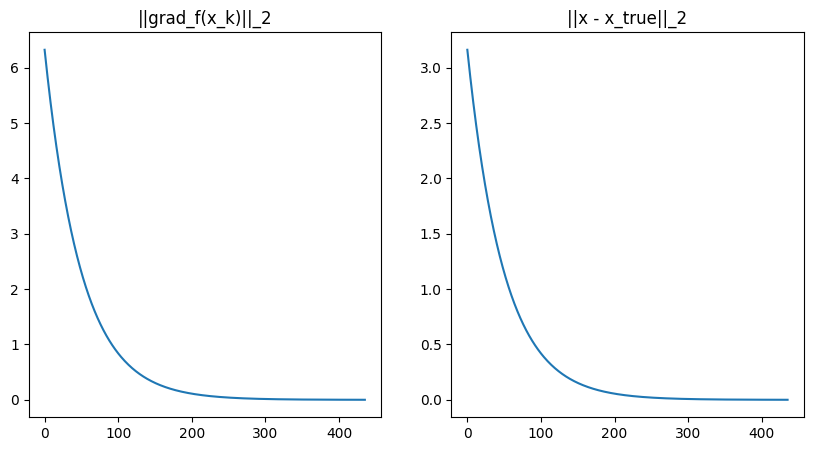

In [68]:
x_true = np.array([3,1])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("||grad_f(x_k)||_2")
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.subplot(1,2,2)
plt.title("||x - x_true||_2")
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()

### GD without backtracking method with alpha = 0.001

In [69]:
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD_WT(f,grad_f, x0, 1000, 1e-5, 1e-5, 1e-3)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [2.59480643 0.86493548]
K= 1000
f(x)= 0.18242425223750627
grad_f(x)= [-0.81038713 -0.27012904]
Error= 0.8542230440289147


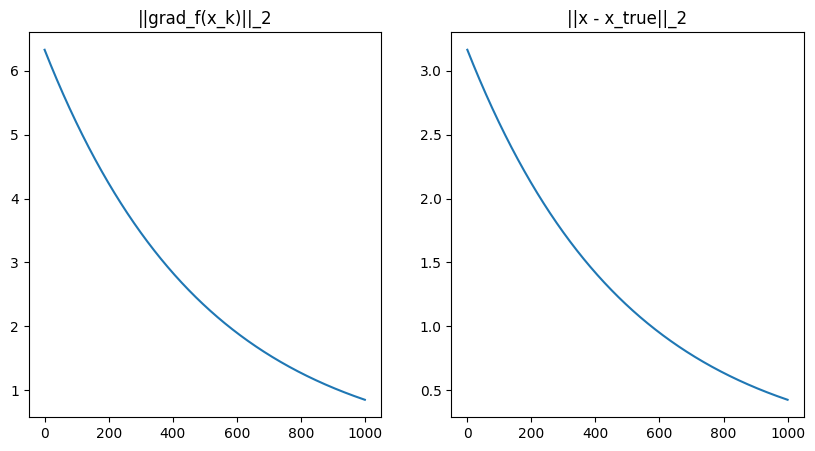

In [70]:
x_true = np.array([3,1])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("||grad_f(x_k)||_2")
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.subplot(1,2,2)
plt.title("||x - x_true||_2")
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()

### GD with backtracking method with kmax = 100

In [71]:
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD(f,grad_f, x0, 100, 1e-5, 1e-5)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [2.99993978 0.99997993]
K= 81
f(x)= 4.029995763705566e-09
grad_f(x)= [-1.20449096e-04 -4.01496987e-05]
Error= 0.00012696449525289447


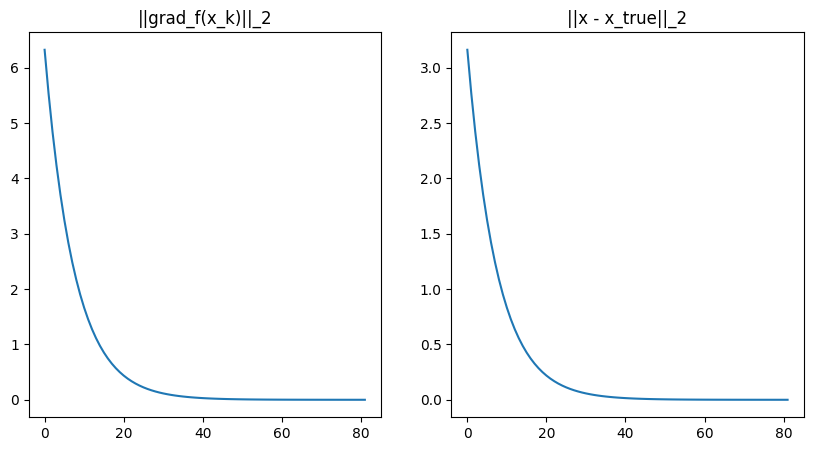

In [72]:
x_true = np.array([3,1])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("||grad_f(x_k)||_2")
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.subplot(1,2,2)
plt.title("||x - x_true||_2")
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()

### Contour plot

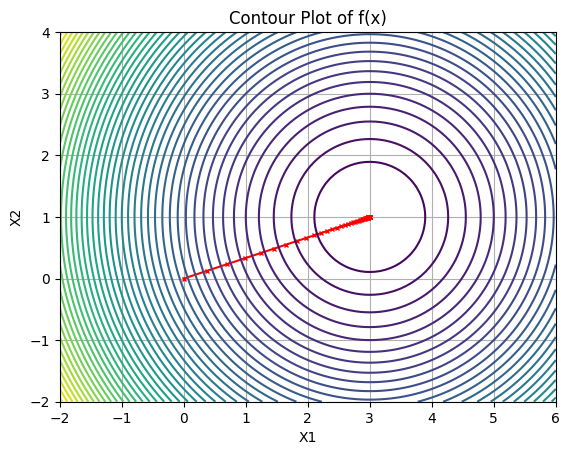

In [73]:
# Define the function f(x)
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1 - 3)**2 + (x2 - 1)**2

# Create a grid of (x1, x2) values
x1 = np.linspace(-2, 6, 100)
x2 = np.linspace(-2, 4, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the corresponding Z values
Z = f([X1, X2])

# Extract x1 and x2 values from the iterations
x1_values, x2_values = zip(*x_comp)

# Plot the path defined by the iterations
plt.plot(x1_values, x2_values, marker='x', linestyle='-', markersize=3, color='red')
plt.contour(X1, X2, Z, levels=50)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Contour Plot of f(x)')
plt.grid()
plt.show()